In [1]:
import pandas as pd
import os
import glob
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [4]:
df = pd.read_csv("prabowo with sentiment.csv")

In [15]:
used_cols = ['created_at', 'full_text', 'retweet_count', 'quote_count', 'username']
df_used = df.copy()
df_used = df_used[used_cols]

In [16]:
# Some functions for preprocessing text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

df_used['text_clean'] = df_used['full_text'].apply(cleaningText)
df_used['text_clean'] = df_used['text_clean'].apply(casefoldingText)
df_used.drop(['full_text'], axis = 1, inplace = True)

df_used['text_preprocessed'] = df_used['text_clean'].apply(tokenizingText)
df_used['text_preprocessed'] = df_used['text_preprocessed'].apply(filteringText)
df_used['text_preprocessed'] = df_used['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams df_used
df_used.drop_duplicates(subset = 'text_clean', inplace = True)

# # Export to csv file
# df_used.to_csv(r'./dataset/21102023cleaned.csv', index = False, header = True,index_label=None)

[nltk_data] Downloading package punkt to C:\Users\Niko
[nltk_data]     Silabest\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Niko
[nltk_data]     Silabest\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Export to csv file
df_used.to_csv('prabowo_test2.csv', index = False, header = True,index_label=None)

In [6]:
pretrained= "w11wo/indonesian-roberta-base-sentiment-classifier"

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [19]:
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}
result = sentiment_analysis(df_used.text_clean[0])
print(f'Text: {df_used.text_clean[0]} | Label : {result[0]["label"]} ({result[0]["score"] * 100:.3f}%)')

Text: paguyuban becak jatim deklarasi dukung prabowo di pilpres   detiknews prabowo menatamasadepan bersamaprabowo | Label : neutral (99.852%)


In [20]:
label = []
for x in df_used.text_clean:
    result = sentiment_analysis(x)
    label.append(result[0]["label"])

In [21]:
df_used["label"] = label

In [22]:
df_used.label.value_counts()

label
neutral     689
negative    220
positive    185
Name: count, dtype: int64

In [ ]:
df_used.to_csv("prabowo with sentiment2.csv",index=False)

In [1]:
import pandas as pd

In [2]:
df2= pd.read_csv("prabowo with sentiment2.csv")

In [3]:
df2

,created_at,retweet_count,quote_count,username,text_clean,text_preprocessed,label
0,Sat Sep 30 23:58:34 +0000 2023,8,0,AdrianaDaneen,paguyuban becak jatim deklarasi dukung prabowo...,"['paguyuban', 'becak', 'jatim', 'deklarasi', '...",neutral
1,Sat Sep 30 23:45:41 +0000 2023,5,3,yanto_gagah032,prabowo lama vs prabowo baru prabowocapresaba...,"['prabowo', 'vs', 'prabowo', 'prabowocapresaba...",neutral
2,Sat Sep 30 23:36:42 +0000 2023,347,0,SudaryonoSudar,saat menyampaikan kuliah umum di universitas m...,"['kuliah', 'universitas', 'muhammadiyah', 'mal...",neutral
3,Sat Sep 30 23:27:40 +0000 2023,0,0,AuntyNovi1978,windrh almaghribis restyjcayah pendukung manta...,"['windrh', 'almaghribis', 'restyjcayah', 'duku...",neutral
4,Sat Sep 30 23:15:19 +0000 2023,0,0,Kemhan_RI,prabowo prabowosubianto menhanprabowo kemhan k...,"['prabowo', 'prabowosubianto', 'menhanprabowo'...",neutral
...,...,...,...,...,...,...,...
1089,Sat Sep 30 18:03:45 +0000 2023,0,0,elektro_yusuf,cnnindonesia emg yakin prabowo bkal menang jgn...,"['cnnindonesia', 'emg', 'prabowo', 'bkal', 'me...",positive
1090,Sat Sep 30 18:02:27 +0000 2023,0,0,nadianurulazmii,ahy prabowo terima konsep perubahan partai dem...,"['ahy', 'prabowo', 'terima', 'konsep', 'ubah',...",neutral
1091,Sat Sep 30 18:02:25 +0000 2023,0,0,nadianurulazmii,sby siap turun gunung memenangkan prabowo di p...,"['sby', 'turun', 'gunung', 'menang', 'prabowo'...",neutral
1092,Sat Sep 30 18:02:19 +0000 2023,0,0,AnsyariNasrull2,mmng yg trsesat itu tdk diakui stelah anda pra...,"['mmng', 'yg', 'trsesat', 'tdk', 'aku', 'stela...",negative


In [3]:
import matplotlib.pyplot as plt

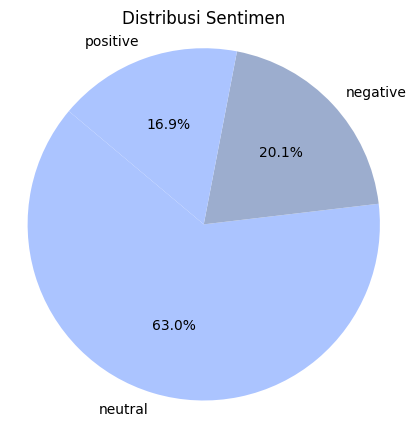

In [4]:
# Menghitung jumlah sentimen
sentiment_counts = df2['label'].value_counts()

# Visualisasi pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#abc4ff','#9cadce','#abc4ff'])
plt.title('Distribusi Sentimen')
plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran
plt.show()

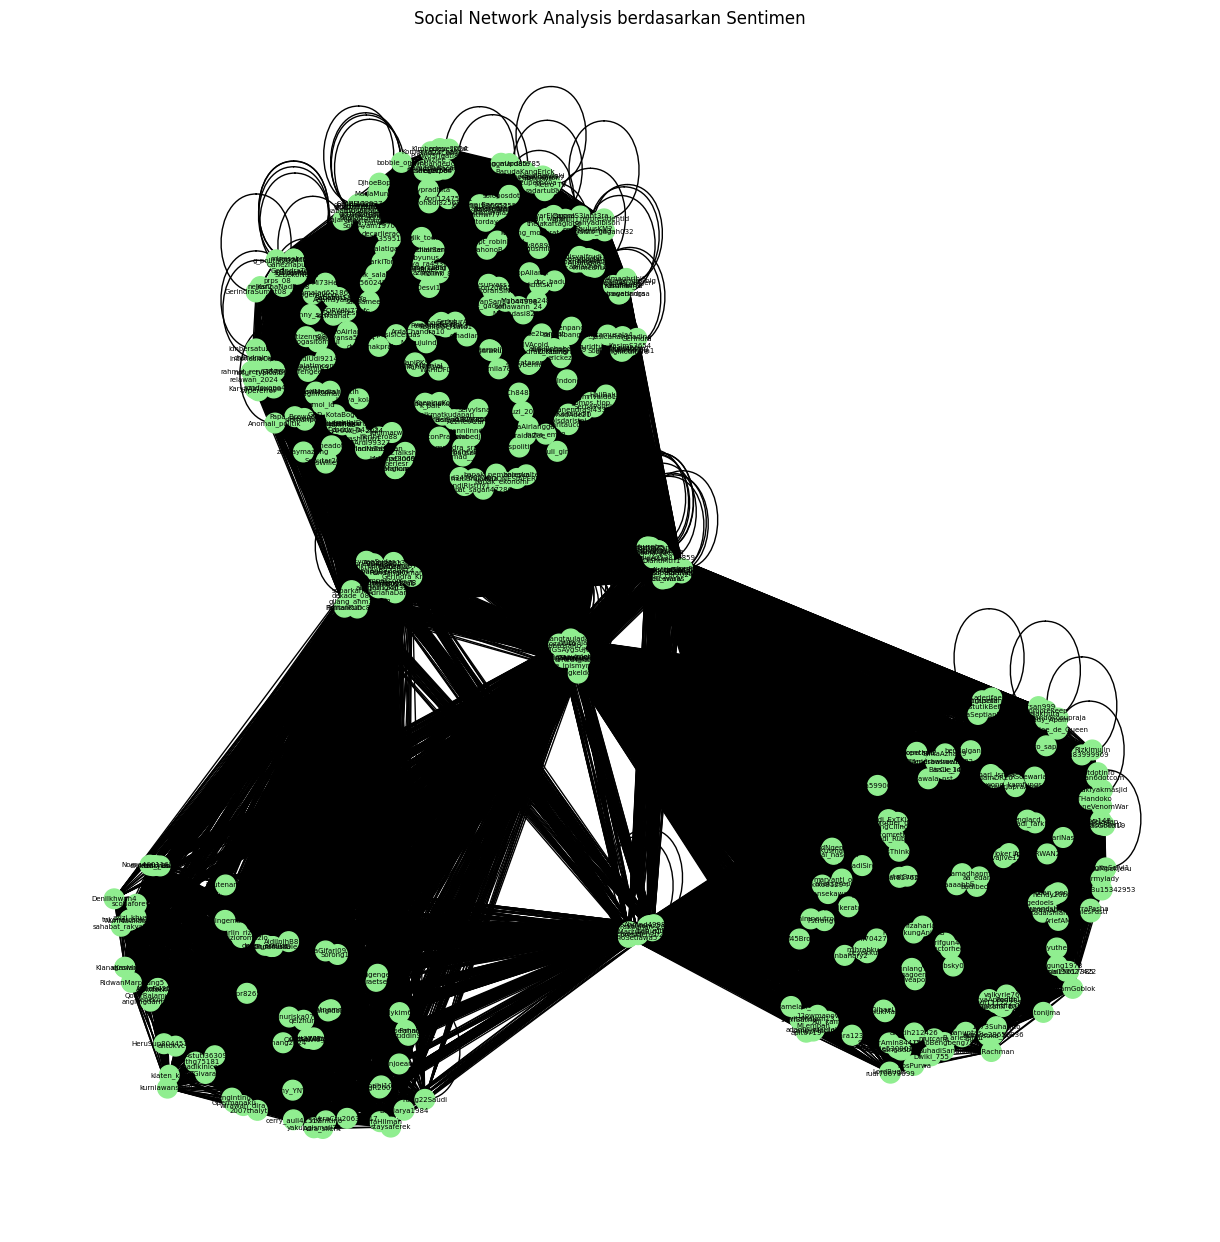

In [5]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Membuat grafik
G = nx.Graph()

# Menambahkan node (pengguna) ke grafik berdasarkan sentimen
for index, row in df2.iterrows():
    G.add_node(row['username'], label=row['label'])

# Menghubungkan pengguna yang berinteraksi dalam sentimen yang sama
for index1, row1 in df2.iterrows():
    for index2, row2 in df2.iterrows():
        if index1 != index2 and row1['label'] == row2['label']:
            G.add_edge(row1['username'], row2['username'])

# Mengatur tampilan grafik
pos = nx.spring_layout(G)  # Anda dapat memilih layout yang sesuai
node_color = ['lightblue' if label == 'Positive' else 'lightcoral' if label == 'Negative' else 'lightgreen' for label in nx.get_node_attributes(G, 'label').values()]

# Menggambar grafik
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_color, font_size=5, font_color='k')
plt.title('Social Network Analysis berdasarkan Sentimen')
plt.show()

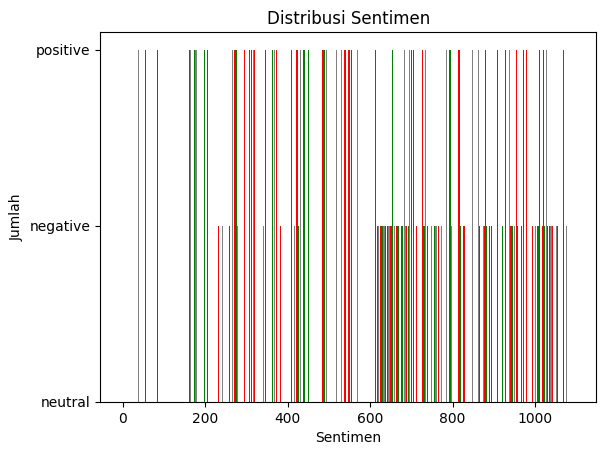

In [7]:
# Pisahkan label dan jumlah dari data
labels = df2.label.keys()
counts = df2.label.values

# Buat grafik batang
plt.bar(labels, counts, color=['green', 'red', 'gray'])

# Tambahkan label pada sumbu-sumbu
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')

# Tambahkan judul grafik
plt.title('Distribusi Sentimen')

# Tampilkan grafik
plt.show()

In [8]:
sorted_df = df2.sort_values(by='quote_count', ascending=False)
top_10_users = sorted_df.head(10)
print(top_10_users[['username','quote_count']])

           username  quote_count
659        BosPurwa          152
190   BANGSAygSUJUD           28
536   BANGSAygSUJUD           16
265   BANGSAygSUJUD           12
194  kesiragerindra           11
558        Gerindra           11
420     bengkeldodo           10
466  kesiragerindra           10
613     bengkeldodo            9
635         M45Broo            7


In [9]:
sorted_df = df2.sort_values(by='retweet_count', ascending=False)
top_10_users = sorted_df.head(10)
print(top_10_users[['username','retweet_count']])

            username  retweet_count
659         BosPurwa            552
2     SudaryonoSudar            347
555   SudaryonoSudar            167
190    BANGSAygSUJUD            155
290   SudaryonoSudar            113
559     don_muzakir_             63
558         Gerindra             63
1056   OposisiCerdas             56
964     brother_djon             46
788        MinmonPS7             46


In [11]:
sorted_df = df2.sort_values(by='created_at', ascending=False)
top_10_users = sorted_df.head(10)
print(top_10_users[['username','created_at']])

            username                      created_at
616      asfan_warah  Sat Sep 30 23:59:33 +0000 2023
617  gilang_ahm31272  Sat Sep 30 23:59:01 +0000 2023
0      AdrianaDaneen  Sat Sep 30 23:58:34 +0000 2023
618  IANMARWAN288270  Sat Sep 30 23:58:29 +0000 2023
619        abu_waras  Sat Sep 30 23:58:09 +0000 2023
620     RSoewarianto  Sat Sep 30 23:57:50 +0000 2023
621        imyuthero  Sat Sep 30 23:57:25 +0000 2023
622    AstutikBertha  Sat Sep 30 23:57:22 +0000 2023
623         kiper_jg  Sat Sep 30 23:56:33 +0000 2023
624  QodirRajamuddin  Sat Sep 30 23:56:29 +0000 2023


In [12]:
sorted_df = df2.sort_values(by='created_at', ascending=True)
top_10_users = sorted_df.head(10)
print(top_10_users[['username','created_at']])

            username                      created_at
615       oyenpancet  Fri Sep 29 02:57:31 +0000 2023
614  GerindraSumut08  Fri Sep 29 03:08:39 +0000 2023
613      bengkeldodo  Fri Sep 29 03:14:01 +0000 2023
612     minesabreast  Fri Sep 29 03:16:07 +0000 2023
611        dekade_08  Fri Sep 29 03:22:53 +0000 2023
610       dpc_badung  Fri Sep 29 03:25:37 +0000 2023
609       AlviraSiwi  Fri Sep 29 03:38:38 +0000 2023
608  gerindra_sragen  Fri Sep 29 03:45:04 +0000 2023
607  gerindra_sragen  Fri Sep 29 03:45:12 +0000 2023
606    AdrianaDaneen  Fri Sep 29 03:45:34 +0000 2023


In [23]:
df2['created_at'] = pd.to_datetime(df2['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

In [26]:
# Gabungkan tanggal, bulan, dan tahun ke dalam satu kolom baru
df2['tanggal'] = df2['created_at'].dt.strftime('%Y-%m-%d')

# Hapus kolom created_at asli jika tidak diperlukan
df2.drop(columns=['created_at'], inplace=True)

In [27]:
df2

,retweet_count,quote_count,username,text_clean,text_preprocessed,label,tanggal
0,8,0,AdrianaDaneen,paguyuban becak jatim deklarasi dukung prabowo...,"['paguyuban', 'becak', 'jatim', 'deklarasi', '...",neutral,2023-09-30
1,5,3,yanto_gagah032,prabowo lama vs prabowo baru prabowocapresaba...,"['prabowo', 'vs', 'prabowo', 'prabowocapresaba...",neutral,2023-09-30
2,347,0,SudaryonoSudar,saat menyampaikan kuliah umum di universitas m...,"['kuliah', 'universitas', 'muhammadiyah', 'mal...",neutral,2023-09-30
3,0,0,AuntyNovi1978,windrh almaghribis restyjcayah pendukung manta...,"['windrh', 'almaghribis', 'restyjcayah', 'duku...",neutral,2023-09-30
4,0,0,Kemhan_RI,prabowo prabowosubianto menhanprabowo kemhan k...,"['prabowo', 'prabowosubianto', 'menhanprabowo'...",neutral,2023-09-30
...,...,...,...,...,...,...,...
1089,0,0,elektro_yusuf,cnnindonesia emg yakin prabowo bkal menang jgn...,"['cnnindonesia', 'emg', 'prabowo', 'bkal', 'me...",positive,2023-09-30
1090,0,0,nadianurulazmii,ahy prabowo terima konsep perubahan partai dem...,"['ahy', 'prabowo', 'terima', 'konsep', 'ubah',...",neutral,2023-09-30
1091,0,0,nadianurulazmii,sby siap turun gunung memenangkan prabowo di p...,"['sby', 'turun', 'gunung', 'menang', 'prabowo'...",neutral,2023-09-30
1092,0,0,AnsyariNasrull2,mmng yg trsesat itu tdk diakui stelah anda pra...,"['mmng', 'yg', 'trsesat', 'tdk', 'aku', 'stela...",negative,2023-09-30


Text(0.5, 0, 'Tanggal')

<Figure size 1200x600 with 0 Axes>

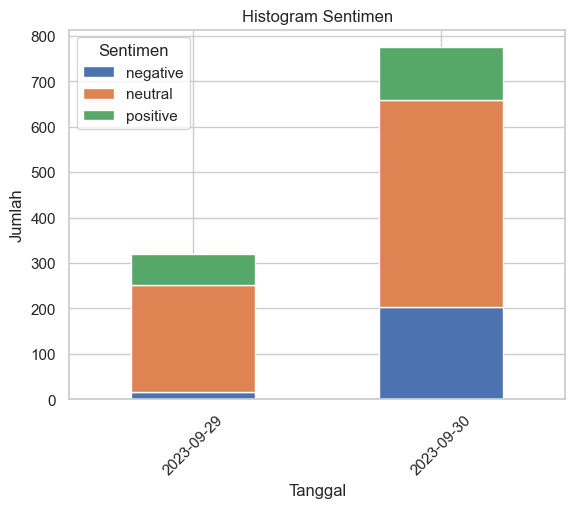

In [28]:
import seaborn as sns
sentimen_counts = df2.groupby(['tanggal', 'label']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sentimen_counts.plot(kind='bar', stacked=True)
plt.title('Histogram Sentimen')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Sentimen')

plt.xlabel('Tanggal')

In [37]:
sentimen_counts = df2.groupby(['tanggal', 'label']).size().unstack(fill_value=0)

# Cetak DataFrame
print(sentimen_counts)


label       negative  neutral  positive
tanggal                                
2023-09-29        16      235        68
2023-09-30       204      454       117


In [36]:
# Kelompokkan data berdasarkan 'username' dan hitung jumlah kutipan dan sentimen
grouped = df2.groupby('username').agg({'quote_count': 'count', 'label': 'count'}).reset_index()

# Urutkan data berdasarkan jumlah kutipan secara menurun
sorted_data = grouped.sort_values(by='quote_count', ascending=False)

# Tampilkan 10 username teratas
top_10_users = sorted_data.head(10)

# Tampilkan hasil
print(top_10_users)

           username  quote_count  label
527  yosephrosario_           54     54
55    BANGSAygSUJUD           49     49
12    AdrianaDaneen           44     44
21   Akubknultramen           31     31
176      Netizenn08           23     23
313     bengkeldodo           20     20
334       dekade_08           18     18
485    sangtauladan           16     16
341      dpc_badung           15     15
358         fathw25           13     13


In [35]:
# Kelompokkan data berdasarkan 'username' dan hitung jumlah kutipan positif, negatif, dan netral
grouped = df2.groupby('username')['label'].value_counts().unstack(fill_value=0).reset_index()

# Urutkan data berdasarkan jumlah kutipan positif secara menurun
sorted_data = grouped.sort_values(by='positive', ascending=False)

# Tampilkan 10 username teratas
top_10_users = sorted_data.head(10)

# Tampilkan hasil
print(top_10_users)

label         username  negative  neutral  positive
55       BANGSAygSUJUD         4       23        22
527     yosephrosario_         3       31        20
485       sangtauladan         2        5         9
478           rubyaja1         1        1         5
184    PS_presiden2024         1        0         5
313        bengkeldodo         7        9         4
218    RondangKomariah         0        4         3
293     are_inismyname         5        2         2
377           imamtino         0        0         2
167          MinmonPS7         2        2         2


In [3]:
# Kelompokkan data berdasarkan 'username' dan hitung jumlah kutipan positif, negatif, dan netral
grouped = df2.groupby('username')['label'].value_counts().unstack(fill_value=0).reset_index()

# Urutkan data berdasarkan jumlah kutipan positif secara menurun
sorted_data = grouped.sort_values(by='negative', ascending=False)

# Tampilkan 10 username teratas
top_10_users = sorted_data.head(10)

# Tampilkan hasil
print(top_10_users)

label         username  negative  neutral  positive
313        bengkeldodo         7        9         4
293     are_inismyname         5        2         2
296    arnoldardian122         5        0         0
60      BersamaAnies24         4        1         0
55       BANGSAygSUJUD         4       23        22
527     yosephrosario_         3       31        20
192     Pejantantangg_         3        1         0
56         B_ariesandi         3        0         0
34       Anies_For2024         2        2         0
408           kiper_jg         2        1         0
